<a href="https://colab.research.google.com/github/Shivanimarri/DELIVER-ON-TIME/blob/main/DAV_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Importing Dataset

In [9]:
df = pd.read_csv('zomato.csv')

In [10]:
df.head()

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,...,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,...,22:10,Fog,Jam,2.0,Snack,motorcycle,3.0,No,Metropolitian,46.0
1,1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,...,15:05,Stormy,High,1.0,Meal,motorcycle,1.0,No,Metropolitian,23.0
2,2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,...,17:40,Sandstorms,Medium,1.0,Drinks,scooter,1.0,No,Metropolitian,21.0
3,3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,...,09:30,Sandstorms,Low,0.0,Buffet,motorcycle,0.0,No,Metropolitian,20.0
4,4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,...,20:05,Fog,Jam,1.0,Snack,scooter,1.0,No,Metropolitian,41.0


ID: Unique identifier for each delivery.

Delivery_person_ID: Unique identifier for delivery personnel.

Delivery_person_Age: Age of the delivery person.

Delivery_person_Ratings: Ratings of the delivery person.

Restaurant_latitude/longitude: Latitude and longitude of the restaurant.

Delivery_location_latitude/longitude: Latitude and longitude of the delivery location.

Order_Date: Date when the order was placed.

Time_Ordered: Time when the order was placed.

Time_Order_picked: Time when the order was picked up by the delivery person.

Weather_conditions: Weather conditions during delivery.

Road_traffic_density: Traffic density during delivery.

Vehicle_condition: Condition of the delivery vehicle.

Type_of_order: Type of food order.

Type_of_vehicle: Vehicle used for delivery.

multiple_deliveries: Whether multiple deliveries were made during the trip.

Festival: Whether it was a festival day.

City: City where the delivery took place.

Time_taken (min): Time taken for delivery in minutes (target variable).

In [11]:
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 21091
Number of columns: 21


In [12]:
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
Unnamed: 0                       int64
ID                              object
Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition              float64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken (min)               float64
dtype: object


In [13]:
print("\nSummary statistics for numerical features:")
print(df.describe())


Summary statistics for numerical features:
       Unnamed: 0  Delivery_person_Age  Delivery_person_Ratings  \
count  21091.0000         20286.000000             20259.000000   
mean   10545.0000            29.594499                 4.633580   
std     6088.5916             5.806630                 0.328061   
min        0.0000            15.000000                 1.000000   
25%     5272.5000            25.000000                 4.500000   
50%    10545.0000            30.000000                 4.700000   
75%    15817.5000            35.000000                 4.900000   
max    21090.0000            50.000000                 6.000000   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
count         21091.000000          21090.000000                21090.000000   
mean             17.014240             70.319408                   17.451183   
std               8.159688             22.746448                    7.331431   
min             -30.902872      

Removing unneccessary columns

In [14]:
columns_to_drop = ['Unnamed: 0','ID', 'Delivery_person_ID', 'Order_Date',
                   'Time_Order_picked','Time_Orderd','Type_of_order']

df = df.drop(columns=columns_to_drop,axis=1)

Handling Null values

In [15]:
missing_values = df.isnull().sum()

In [16]:
columns_with_missing_values = missing_values[missing_values > 0]

In [17]:
print("Columns with missing values:")
print(columns_with_missing_values)

Columns with missing values:
Delivery_person_Age            805
Delivery_person_Ratings        832
Restaurant_longitude             1
Delivery_location_latitude       1
Delivery_location_longitude      1
Weather_conditions             281
Road_traffic_density           275
Vehicle_condition                1
Type_of_vehicle                  1
multiple_deliveries            444
Festival                        97
City                           543
Time_taken (min)                 1
dtype: int64


In [18]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2.0,motorcycle,3.0,No,Metropolitian,46.0
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1.0,motorcycle,1.0,No,Metropolitian,23.0
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1.0,scooter,1.0,No,Metropolitian,21.0
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0.0,motorcycle,0.0,No,Metropolitian,20.0
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1.0,scooter,1.0,No,Metropolitian,41.0


In [19]:
df = df.dropna()

In [20]:
df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].mean(), inplace=True)

In [21]:
categorical_columns = ['Weather_conditions', 'Road_traffic_density', 'multiple_deliveries', 'Festival', 'City']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

Handling Duplicate values

In [22]:
duplicate_rows = df.duplicated()

In [23]:
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


Handling Datatypes

In [24]:
df['Weather_conditions'] = df['Weather_conditions'].astype('category')
df['Road_traffic_density'] = df['Road_traffic_density'].astype('category')
df['Vehicle_condition'] = df['Vehicle_condition'].astype('category')
df['Type_of_vehicle'] = df['Type_of_vehicle'].astype('category')
df['Festival'] = df['Festival'].astype('category')
df['City'] = df['City'].astype('category')

In [25]:
print(df.dtypes)

Delivery_person_Age             float64
Delivery_person_Ratings         float64
Restaurant_latitude             float64
Restaurant_longitude            float64
Delivery_location_latitude      float64
Delivery_location_longitude     float64
Weather_conditions             category
Road_traffic_density           category
Vehicle_condition              category
Type_of_vehicle                category
multiple_deliveries             float64
Festival                       category
City                           category
Time_taken (min)                float64
dtype: object


Handling Outliers

In [26]:
for i in df.columns:
   print(f'{i}:{df[i].dtype}')
   unique_value=df[i].unique()
   print(unique_value)
   print('\n')

Delivery_person_Age:float64
[36. 21. 23. 34. 24. 29. 35. 33. 25. 31. 37. 27. 32. 26. 38. 20. 22. 28.
 39. 30.]


Delivery_person_Ratings:float64
[4.2 4.7 4.3 4.5 4.  4.1 5.  4.8 4.9 3.5 4.6 4.4 3.8 3.9 3.7 2.6 2.5 3.6
 3.1 2.7 3.2 3.3 3.4 2.8 2.9 3. ]


Restaurant_latitude:float64
[ 30.327968  10.003064  18.56245   30.899584  26.463504  19.176269
  12.311072  18.592718  22.552672  18.563934  23.357804  11.003669
  12.986047  19.221315  13.005801  26.849596  21.160522  12.934179
  18.51421   11.022477  21.160437  15.51315   15.561295   0.
  18.55144   18.593481  21.173343  17.451976  12.972532  13.064181
  21.149569  19.091458  22.539129  12.970324  21.175975  23.369746
  12.914264  11.003681  10.96185   27.165108  26.913987  12.3085
  21.183434  19.254567  25.449659  30.372202  12.972793  21.157735
  21.186438  17.431477  12.933298  22.311358  12.934365  13.086438
  26.913483  17.411028  15.5696    19.876428  12.939496  17.433809
  23.374878 -27.163303  22.74806   26.891191  12.316967 

Boxplot


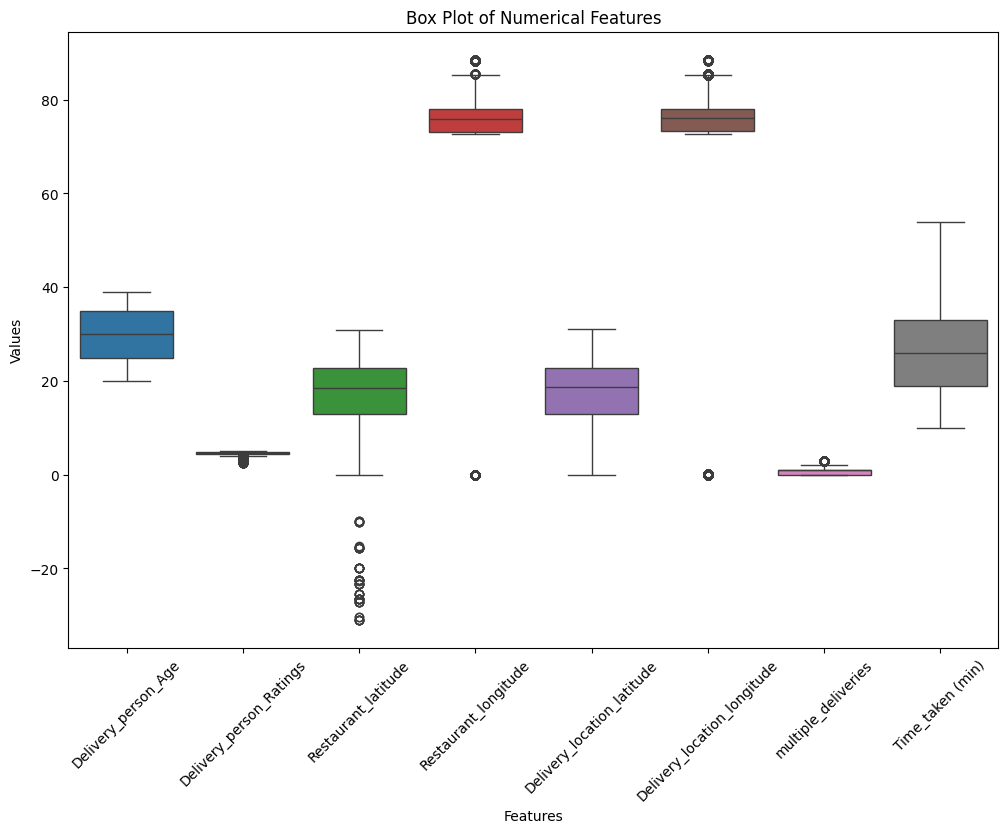

In [29]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_columns)
plt.xticks(rotation=45)
plt.title('Box Plot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [30]:
df=df.drop(df[df['Delivery_person_Ratings']==6.0].index)

Handling Zero values

In [31]:
rlatitude=(df['Restaurant_latitude']==0).sum()
print(rlatitude)

1518


In [32]:
rlongitude=(df['Restaurant_longitude']==0).sum()
print(rlongitude)

1518


In [33]:
dlatitude=(df['Delivery_location_latitude']==0).sum()
print(dlatitude)

0


In [34]:
dlongitude=(df['Delivery_location_longitude']==0).sum()
print(dlongitude)

0


In [35]:
m_latitude=df['Restaurant_latitude'].median()
df['Restaurant_latitude'].fillna(m_latitude,inplace=True)

In [36]:
m_longitude=df['Restaurant_longitude'].median()
df['Restaurant_longitude'].fillna(m_longitude,inplace=True)

Feature Engineering

In [37]:
R= 6371
def deg_to_rad(degrees):
  return degrees*(np.pi/180)

In [38]:
def distcalculate(lat1, lon1, lat2, lon2):
  d_lat= deg_to_rad(lat2-lat1)
  d_lon= deg_to_rad(lon2-lon1)
  a= np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1))*np.cos(deg_to_rad(lat2))*np.sin(d_lon/2)**2
  c= 2*np.arctan2(np.sqrt(a), np.sqrt(1-a))
  return R*c

In [39]:
df['distance'] = df.apply(lambda row: distcalculate(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

In [40]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2.0,motorcycle,3.0,No,Metropolitian,46.0,10.280582
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1.0,motorcycle,1.0,No,Metropolitian,23.0,6.242319
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1.0,scooter,1.0,No,Metropolitian,21.0,13.787860
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0.0,motorcycle,0.0,No,Metropolitian,20.0,2.930258
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1.0,scooter,1.0,No,Metropolitian,41.0,19.396618


In [41]:
columns_to_drop1 = ['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']

df = df.drop(columns=columns_to_drop1,axis=1)

In [42]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,36.0,4.2,Fog,Jam,2.0,motorcycle,3.0,No,Metropolitian,46.0,10.280582
1,21.0,4.7,Stormy,High,1.0,motorcycle,1.0,No,Metropolitian,23.0,6.242319
2,23.0,4.7,Sandstorms,Medium,1.0,scooter,1.0,No,Metropolitian,21.0,13.787860
3,34.0,4.3,Sandstorms,Low,0.0,motorcycle,0.0,No,Metropolitian,20.0,2.930258
4,24.0,4.7,Fog,Jam,1.0,scooter,1.0,No,Metropolitian,41.0,19.396618


Relationship between Features and Time Taken

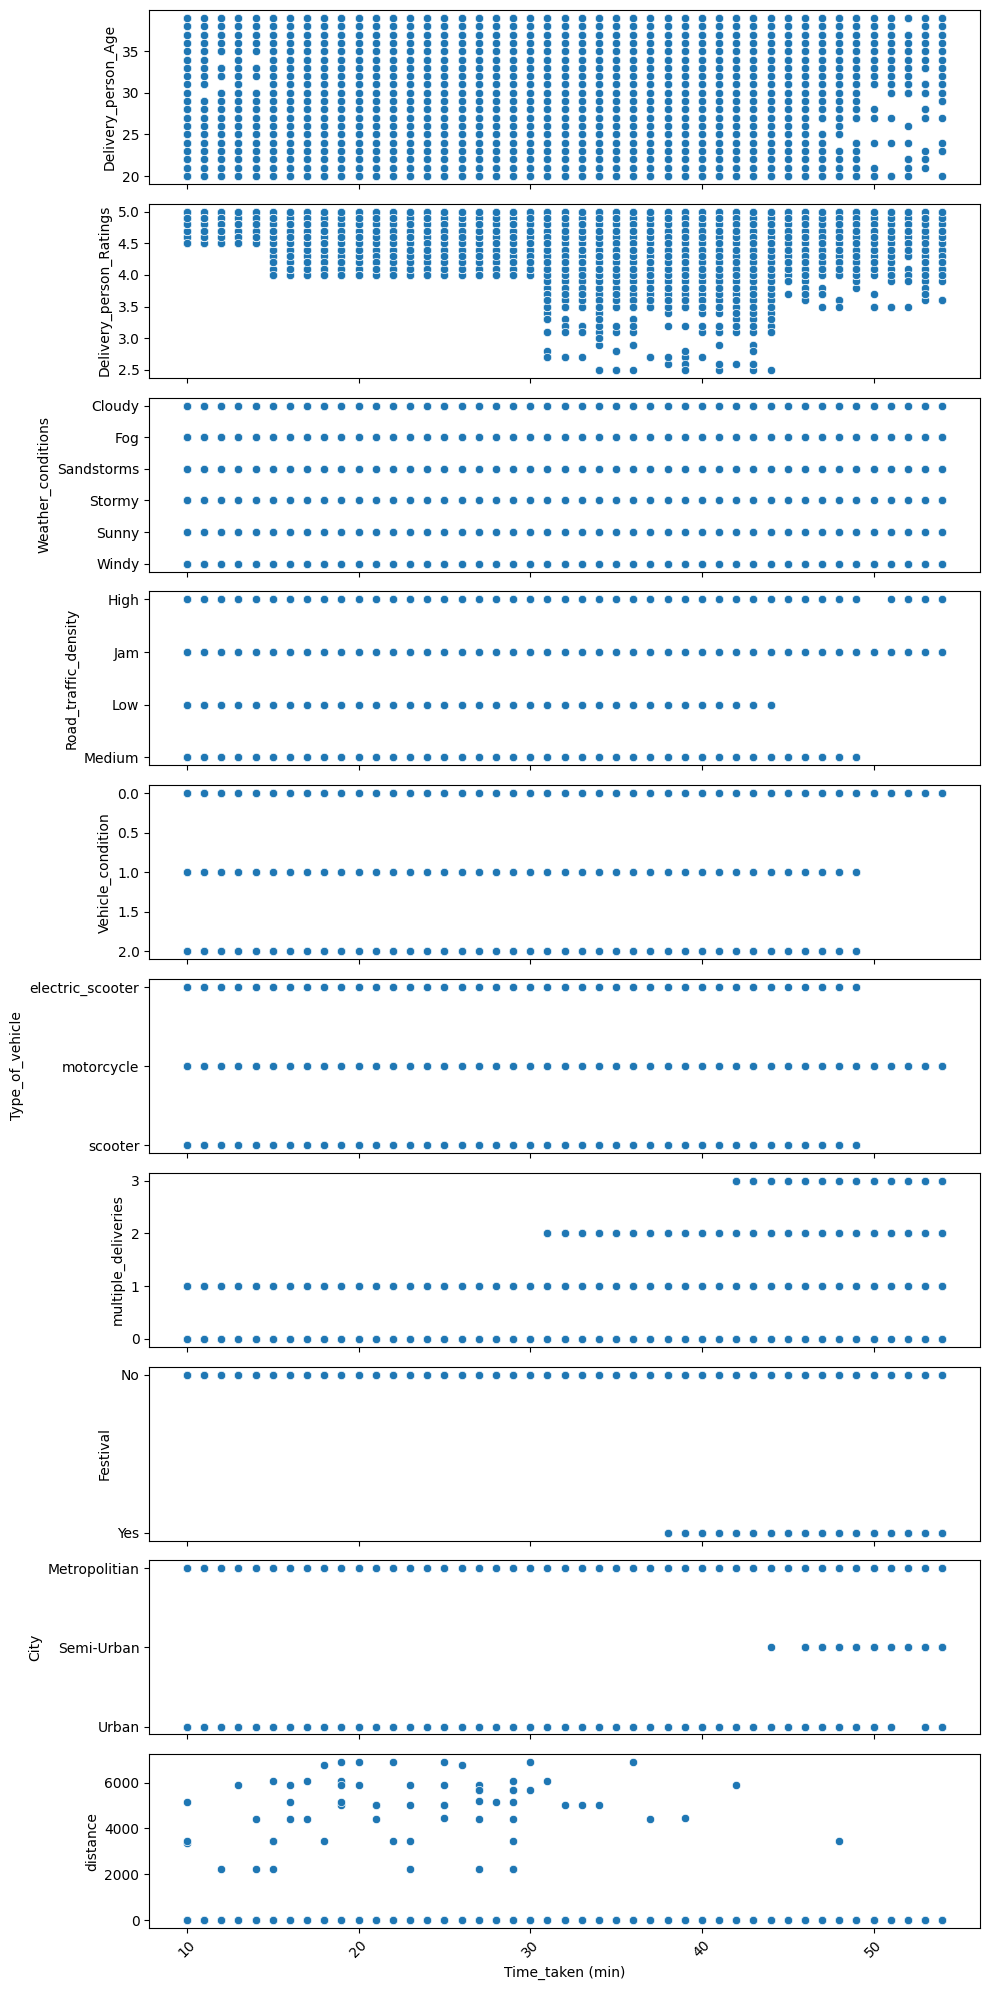

In [43]:
features = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Weather_conditions',
            'Road_traffic_density', 'Vehicle_condition', 'Type_of_vehicle',
            'multiple_deliveries', 'Festival', 'City', 'distance']

# Create subplots for each feature
fig, axes = plt.subplots(len(features), 1, figsize=(10, 20), sharex=True)

# Iterate over features and create scatter plots
for i, feature in enumerate(features):
    sns.scatterplot(data=df, x='Time_taken (min)', y=feature, ax=axes[i])
    axes[i].set_ylabel(feature)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


Correlation Heatmap of Features

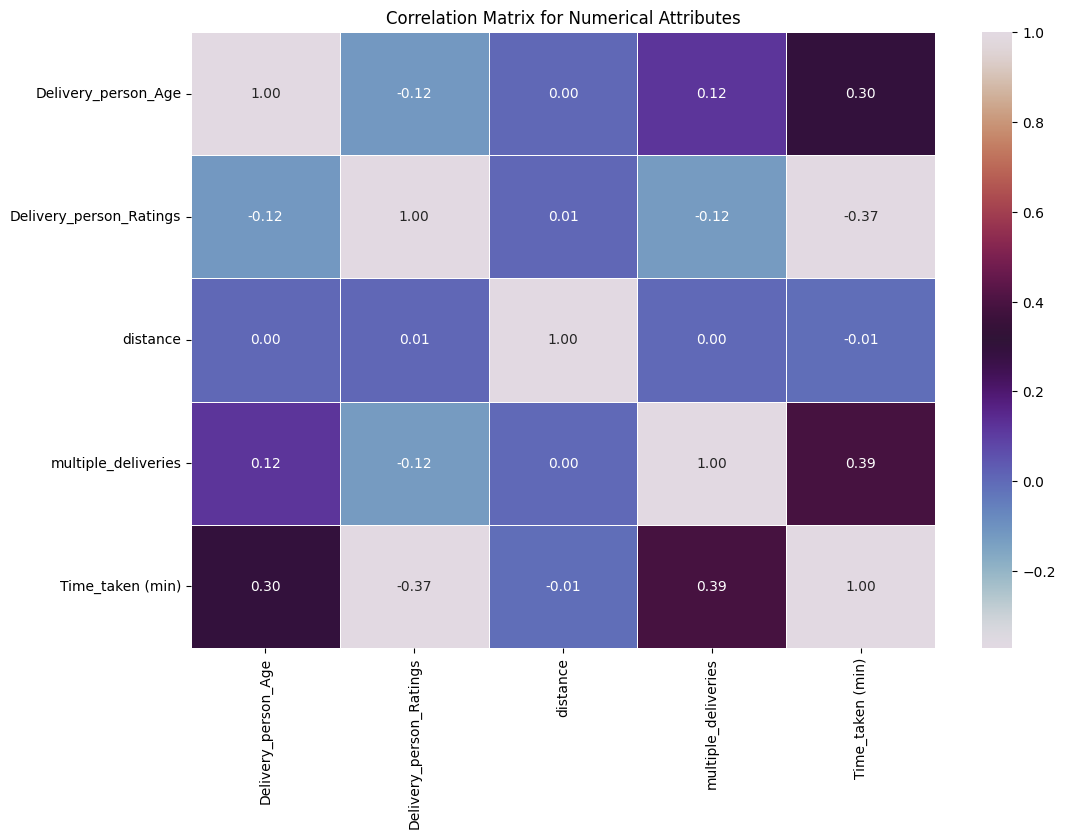

In [44]:
numerical_columns = ['Delivery_person_Age', 'Delivery_person_Ratings','distance',
                     'multiple_deliveries', 'Time_taken (min)']

# Compute the correlation matrix for numerical attributes
corr_matrix = df[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='twilight', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numerical Attributes')
plt.show()